In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

,Time,Open,High,Low,Close,Volume
30000,1629592200000,1.2251,1.2281,1.2247,1.2274,256002.37
30001,1629592260000,1.2275,1.2275,1.2260,1.2268,137690.89
30002,1629592320000,1.2268,1.2270,1.2260,1.2266,43401.56
30003,1629592380000,1.2266,1.2267,1.2254,1.2260,118702.32
30004,1629592440000,1.2260,1.2279,1.2259,1.2269,398406.63
...,...,...,...,...,...,...
30495,1629621900000,1.2427,1.2442,1.2425,1.2432,207965.91
30496,1629621960000,1.2432,1.2438,1.2428,1.2433,73413.78
30497,1629622020000,1.2432,1.2441,1.2432,1.2441,124995.63
30498,1629622080000,1.2441,1.2441,1.2428,1.2430,184059.97


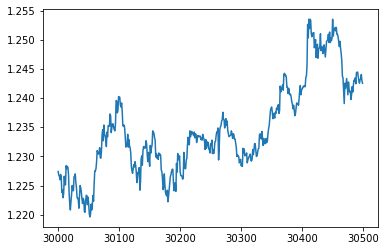

In [32]:
#df = pd.read_csv("XRPUSDT-1m-2021-09-01.csv")
df = pd.read_csv("XRPUSDT-8.csv")
#df = df.drop('Time',axis=1)
df = df[30000:30500]
plt.plot(df['Close'])
plt.show
df

In [33]:
arr = pd.DataFrame(np.array(df['Close']))[0]
pro = 0
fee = 0.001
arr

0      1.2274
1      1.2268
2      1.2266
3      1.2260
4      1.2269
        ...  
495    1.2432
496    1.2433
497    1.2441
498    1.2430
499    1.2426
Name: 0, Length: 500, dtype: float64

In [34]:
def calc(pro):
    grosspro = ((arr[arr<(arr.max()*(1-pro))].sum())*pro)
    grosscost1 = (arr[arr>=(arr.max()*(1-pro))].sum()) - len(arr[arr>=(arr.max()*(1-pro))])*arr.mean()
    grosscost2 = arr.sum()*fee
    prof = grosspro - grosscost1 - grosscost2
    return prof

In [35]:
t=0.01
initial = calc(pro)
print(initial)
for i in range(30):
    pro += t
    if(initial>calc(pro)):
        pro -= t
        t *= 0.1
    else:
        initial=calc(pro)
print(pro)
net = calc(pro)
net

-0.6745230000000008
0.014518139999999992


3.5659402067739383

In [36]:
(net/arr.sum())*100

0.5777090336956046

In [37]:
arr.sum()

617.2554

In [38]:
def calc2(p):
    le = len(arr)
    d = np.zeros(le)
    sumt=0
    pro2=0
    for i in range(le):
        d[i] = arr[i]
        m = d*(1+p)
        n=m-d
        if(sumt<d.sum()):
            sumt = d.sum()
        pro2 += (n[np.where((m<=arr[i])&(m>0))]).sum()
        d[np.where((m<=arr[i])&(m>0))] = 0
    pro2 -= arr.sum()*fee
    pro2 -= (d[np.where(d>0)]-arr[len(arr)-1]).sum()
    return pro2/sumt

In [39]:
t=0.01
pro = 0
initial = calc2(pro)
print(initial)
for i in range(20):
    pro += t
    if(initial>calc2(pro)):
        pro -= t
        t *= 0.1
    else:
        initial=calc2(pro)
    print(i," - ",pro)

print(initial)

-0.49238624760689215
0  -  0.01
1  -  0.01
2  -  0.011
3  -  0.012
4  -  0.013000000000000001
5  -  0.014000000000000002
6  -  0.015000000000000003
7  -  0.015000000000000003
8  -  0.015000000000000003
9  -  0.015010000000000003
10  -  0.015020000000000002
11  -  0.015030000000000002
12  -  0.015040000000000001
13  -  0.015050000000000001
14  -  0.015050000000000001
15  -  0.015051
16  -  0.015052
17  -  0.015052999999999999
18  -  0.015053999999999998
19  -  0.015054999999999997
0.011773689183090123


<function matplotlib.pyplot.show(close=None, block=None)>

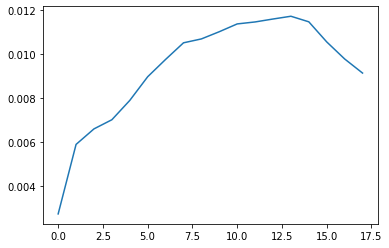

In [49]:
pro = np.arange(0,0.02,0.001)
ans = np.zeros(len(pro))
for i in range(len(pro)):
    ans[i] = calc2(pro[i])
plt.plot(ans[2:])
plt.show

In [47]:
ans

array([-0.49238625, -0.00318156,  0.00272074,  0.00588667,  0.00659407,
        0.00701054,  0.00789081,  0.00896907,  0.00975779,  0.01051459,
        0.01069205,  0.01102043,  0.01137506,  0.01146525,  0.01159863,
        0.01172486,  0.01147072,  0.01055561,  0.00978003,  0.00913675])

In [ ]:
pro[10]